In [ ]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D, Conv2DTranspose,ReLU, UpSampling2D, Concatenate, Conv2DTranspose
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
from keras.models import load_model
from keras import backend
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [4]:
MAIN_IMAGE_PATH = Path("../input/semantic-segmentation-of-underwater-imagery-suim/train_val/images")
MAIN_MASK_PATH = Path("../input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks")

OBJECT_PATH = list(MAIN_IMAGE_PATH.glob(r"*.jpg"))
MASK_PATH = list(MAIN_MASK_PATH.glob(r"*.bmp"))

OBJECT_PATH = sorted(OBJECT_PATH)
MASK_PATH = sorted(MASK_PATH)

OBJECT_SERIES = pd.Series(OBJECT_PATH,name="OBJECTS").astype(str)
MASK_SERIES = pd.Series(MASK_PATH,name="MASK").astype(str)

MAIN_DATA = pd.concat([OBJECT_SERIES,MASK_SERIES],axis=1)

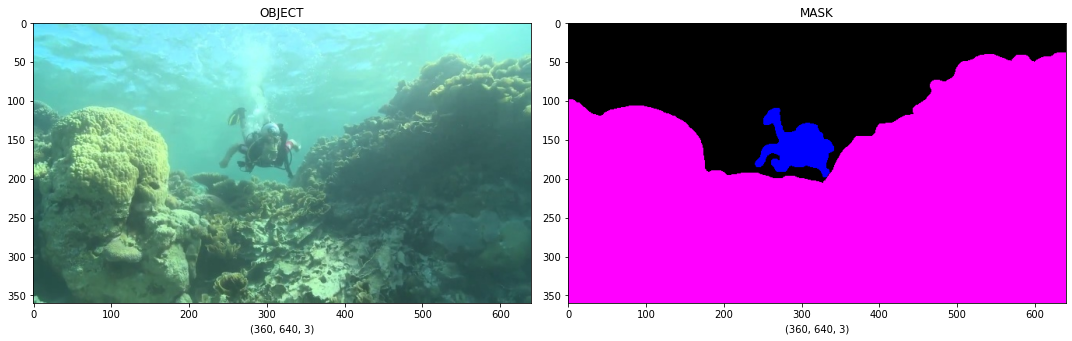

In [17]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][10]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][10]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

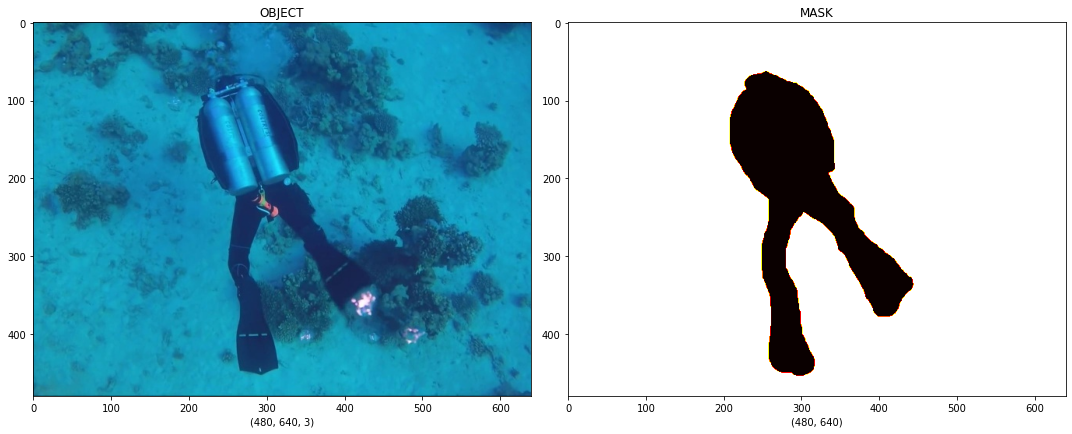

In [21]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][43]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][43]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0],cmap="hot")

plt.tight_layout()
plt.show()

TRANSFORMATION LAYER

PROCESS -1

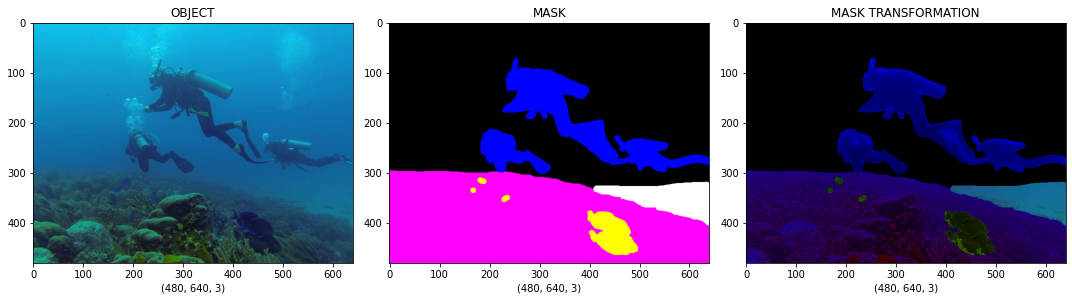

In [22]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[EXAMPLE_MASK == 0] = 0

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANSFORMATION")
axis[2].imshow(COPY_OBJECT)


plt.tight_layout()
plt.show()

PROCESS 2

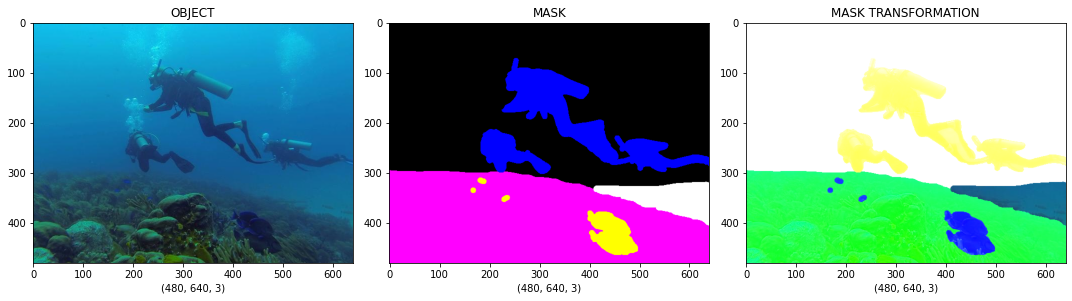

In [23]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[EXAMPLE_MASK == 0] = 255

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANSFORMATION")
axis[2].imshow(COPY_OBJECT)


plt.tight_layout()
plt.show()

PROCESS 3

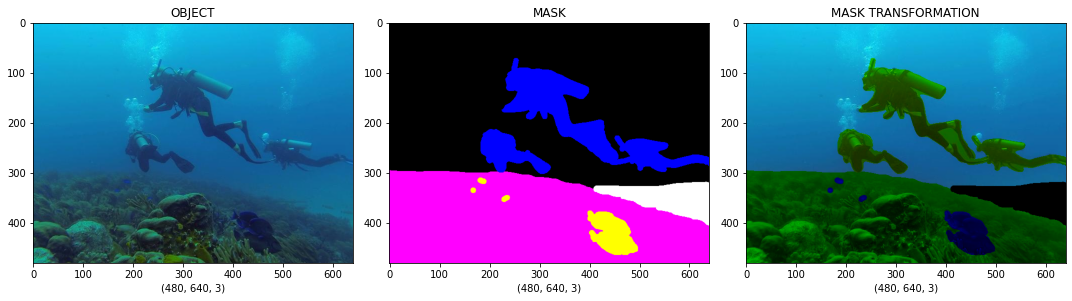

In [24]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[EXAMPLE_MASK == 255] = 0

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANSFORMATION")
axis[2].imshow(COPY_OBJECT)


plt.tight_layout()
plt.show()

PROCESS 4

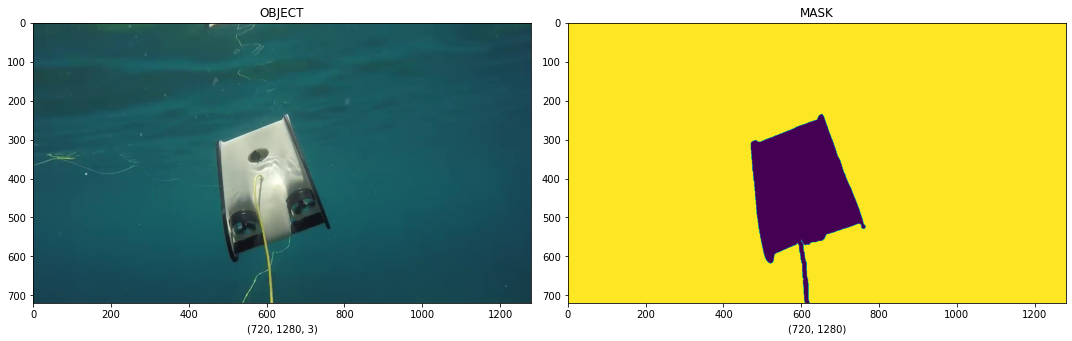

In [26]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][5]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][5]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 0)


plt.tight_layout()
plt.show()

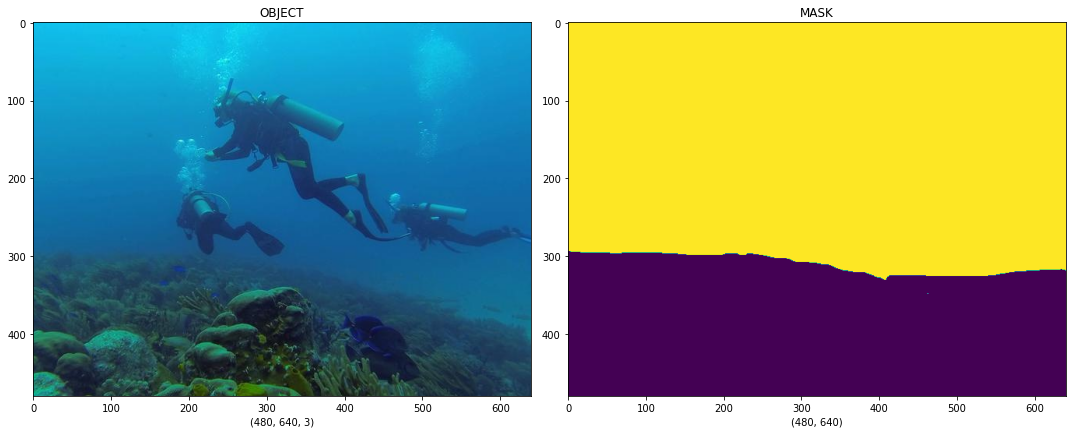

In [27]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 0)


plt.tight_layout()
plt.show()

PROCESS 5

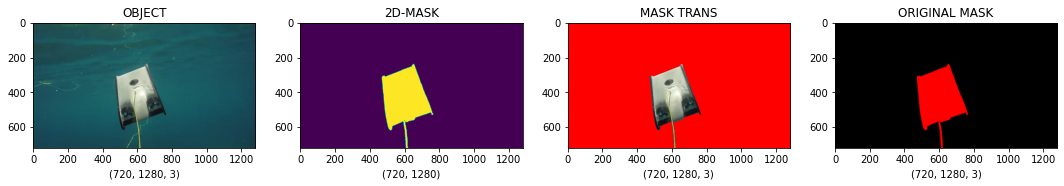

In [28]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][5]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][5]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS] = [255,0,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

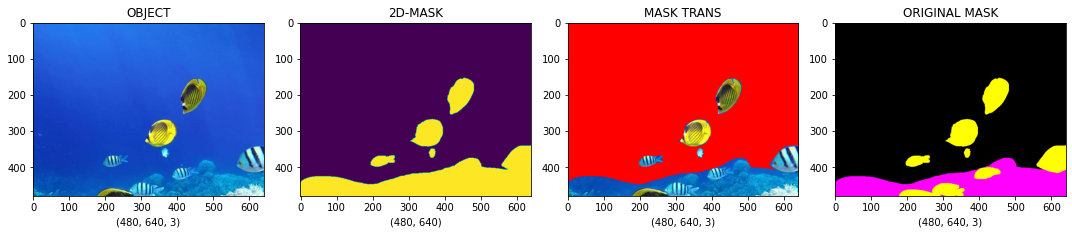

In [30]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][885]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][885]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS] = [255,0,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

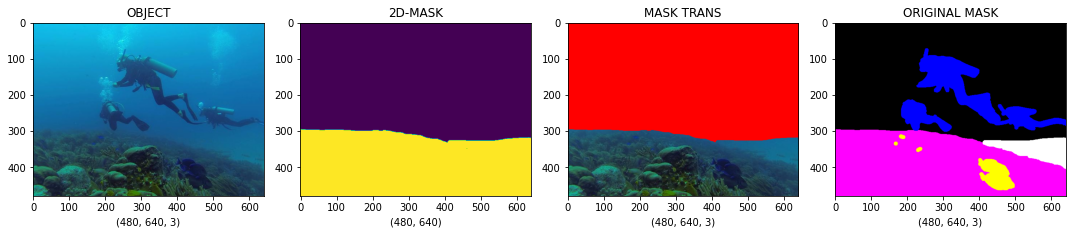

In [29]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS] = [255,0,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

PROCESS 6


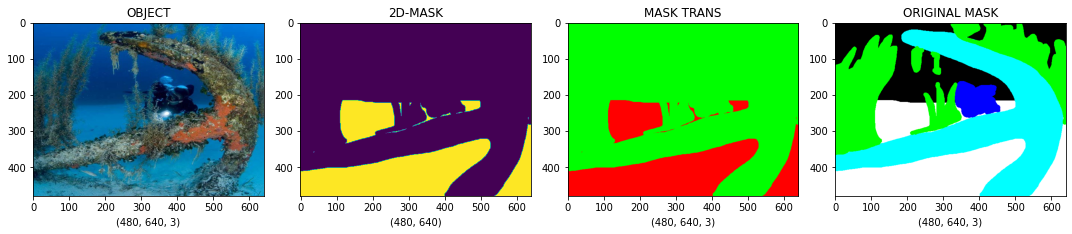

In [31]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][1500]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][1500]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS == 0] = [255,0,0]
COPY_OBJECT[OBJECT_PATH_TRANS == 1] = [0,255,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

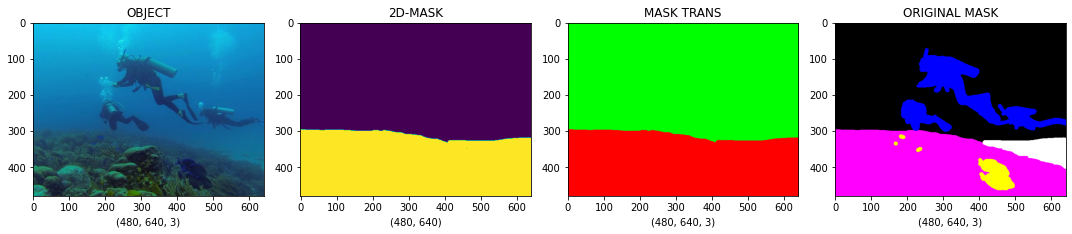

In [32]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS == 0] = [255,0,0]
COPY_OBJECT[OBJECT_PATH_TRANS == 1] = [0,255,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

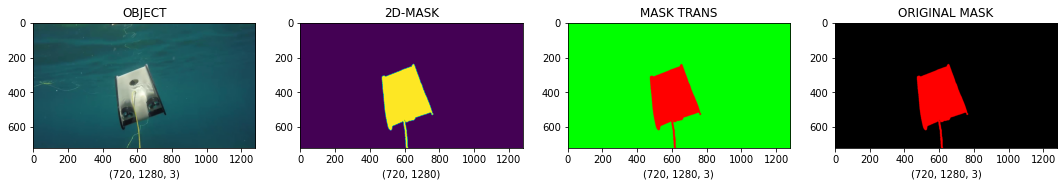

In [33]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][5]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][5]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS == 0] = [255,0,0]
COPY_OBJECT[OBJECT_PATH_TRANS == 1] = [0,255,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

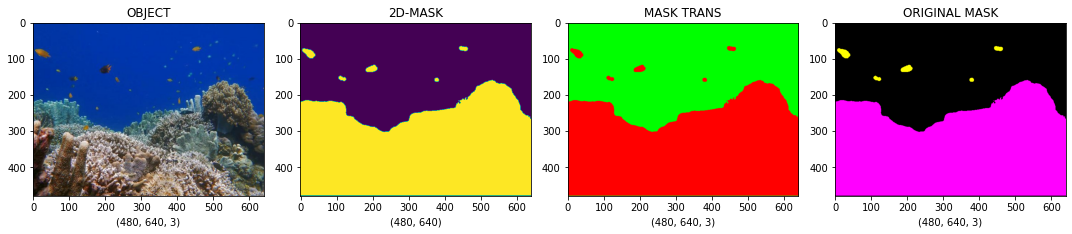

In [35]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][1000]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][1000]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 0

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS == 0] = [255,0,0]
COPY_OBJECT[OBJECT_PATH_TRANS == 1] = [0,255,0]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK[:,:,0].shape)
axis[1].set_title("2D-MASK")
axis[1].imshow(EXAMPLE_MASK[:,:,0] == 255)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

PROCESS 7

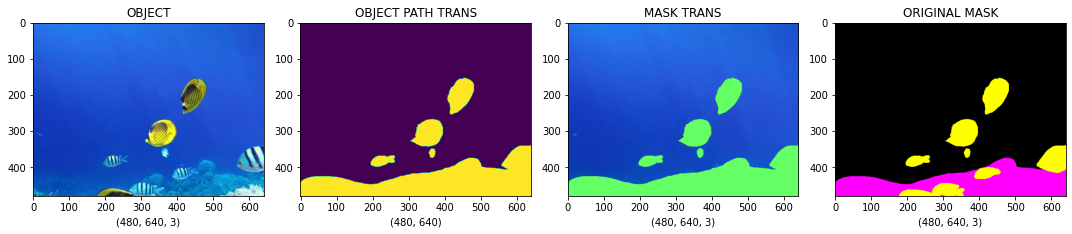

In [36]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][885]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][885]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 255

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS] = [100,255,100]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

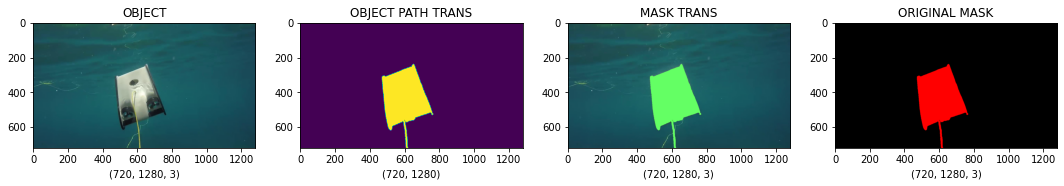

In [37]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][5]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][5]),cv2.COLOR_BGR2RGB)

OBJECT_PATH_TRANS = EXAMPLE_MASK[:,:,0] == 255

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[OBJECT_PATH_TRANS] = [100,255,100]

figure,axis = plt.subplots(1,4,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(COPY_OBJECT.shape)
axis[2].set_title("MASK TRANS")
axis[2].imshow(COPY_OBJECT)

axis[3].set_xlabel(EXAMPLE_MASK.shape)
axis[3].set_title("ORIGINAL MASK")
axis[3].imshow(EXAMPLE_MASK)


plt.tight_layout()
plt.show

**COLORSPACE**

**3D SPACE**

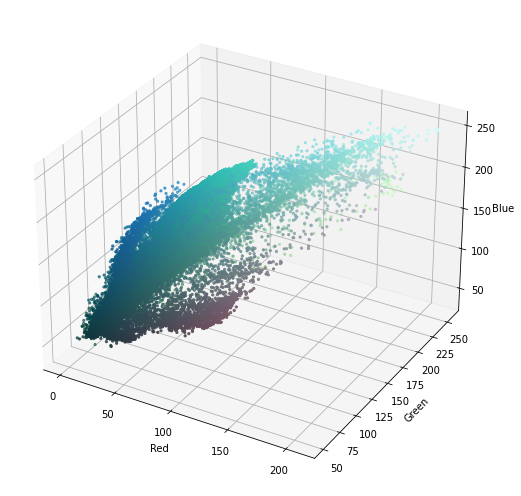

In [39]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][3]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

figure = plt.figure(figsize=(7,7))
axis_func = figure.add_subplot(1, 1, 1, projection="3d")

Pixel_Colors_I = EXAMPLE_OBJECT.reshape((np.shape(EXAMPLE_OBJECT)[0] * np.shape(EXAMPLE_OBJECT)[1], 3))
Normalize_I = colors.Normalize(vmin=-1.,vmax=1.)
Normalize_I.autoscale(Pixel_Colors_I)
Result_Pixel = Normalize_I(Pixel_Colors_I).tolist()

axis_func.scatter(Red_I.flatten(), Green_I.flatten(), Blue_I.flatten(), facecolors=Result_Pixel, marker=".")

axis_func.set_xlabel("Red")
axis_func.set_ylabel("Green")
axis_func.set_zlabel("Blue")

plt.tight_layout()
plt.show()

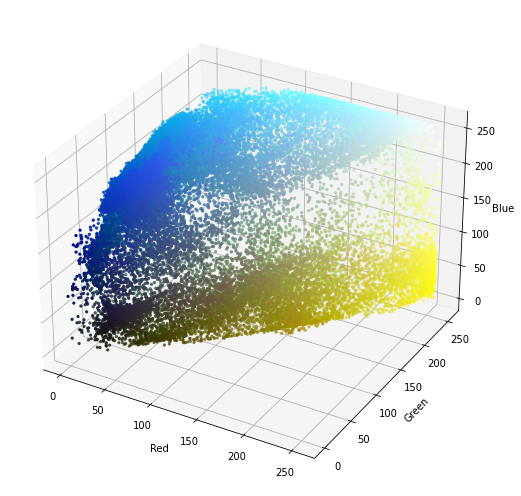

In [40]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][885]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

figure = plt.figure(figsize=(7,7))
axis_func = figure.add_subplot(1, 1, 1, projection="3d")

Pixel_Colors_I = EXAMPLE_OBJECT.reshape((np.shape(EXAMPLE_OBJECT)[0] * np.shape(EXAMPLE_OBJECT)[1], 3))
Normalize_I = colors.Normalize(vmin=-1.,vmax=1.)
Normalize_I.autoscale(Pixel_Colors_I)
Result_Pixel = Normalize_I(Pixel_Colors_I).tolist()

axis_func.scatter(Red_I.flatten(), Green_I.flatten(), Blue_I.flatten(), facecolors=Result_Pixel, marker=".")

axis_func.set_xlabel("Red")
axis_func.set_ylabel("Green")
axis_func.set_zlabel("Blue")

plt.tight_layout()
plt.show()

**SUB LAYER**

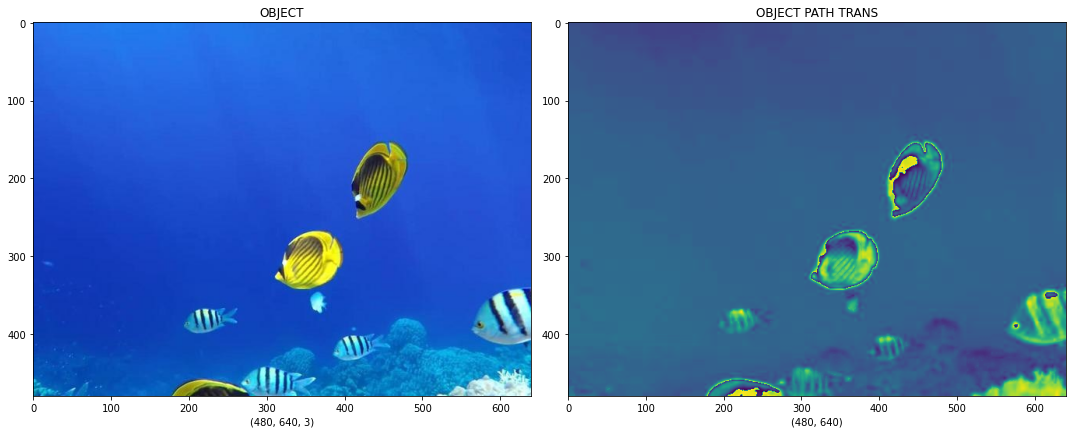

In [41]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][885]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][885]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,0] - Blue_I

figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)


plt.tight_layout()
plt.show()

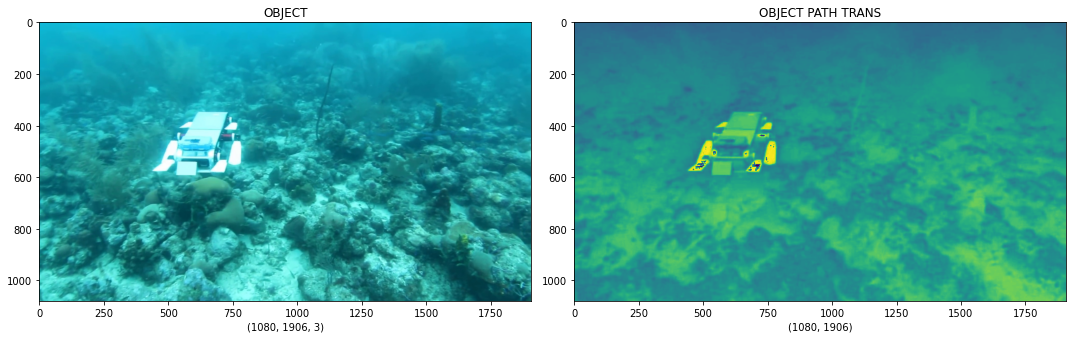

In [42]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][7]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][7]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,0] - Green_I

figure,axis = plt.subplots(1,2,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)


plt.tight_layout()
plt.show()

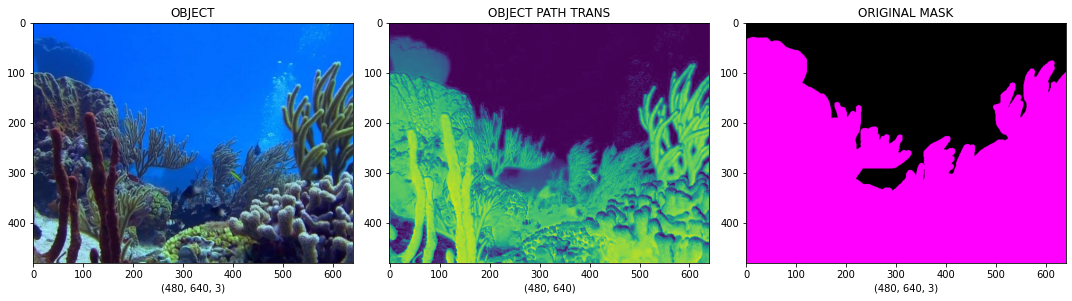

In [43]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][777]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][777]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,0] - (Red_I + Blue_I)

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

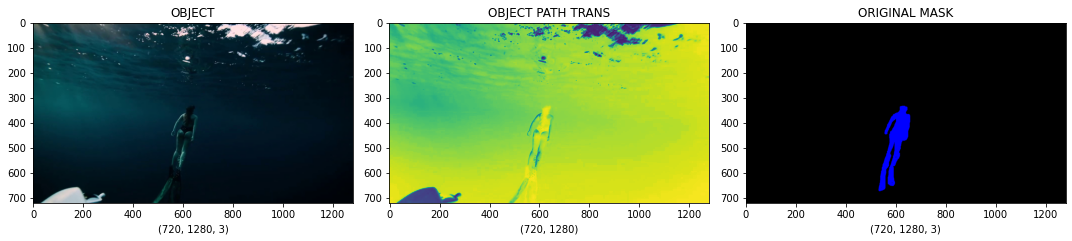

In [44]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][66]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][66]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,0] - (Red_I + Blue_I)

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

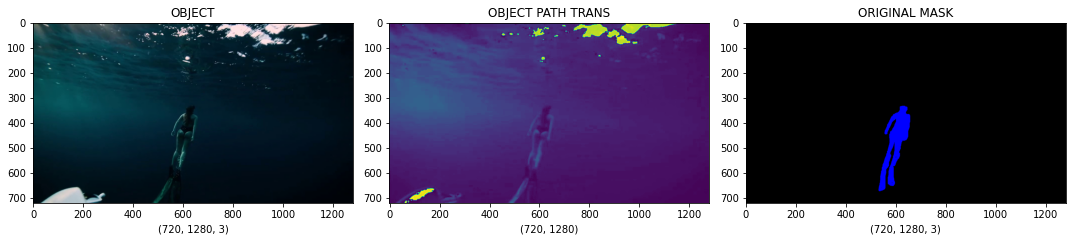

In [45]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][66]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][66]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,1] - Red_I

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

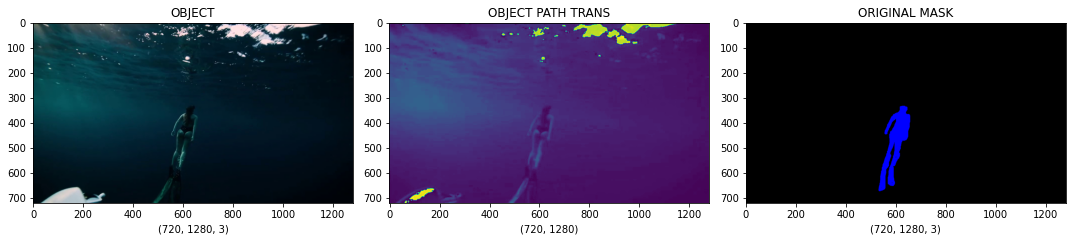

In [46]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][66]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][66]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_OBJECT)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,1] - Red_I

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

**SUBLAYER MASK**

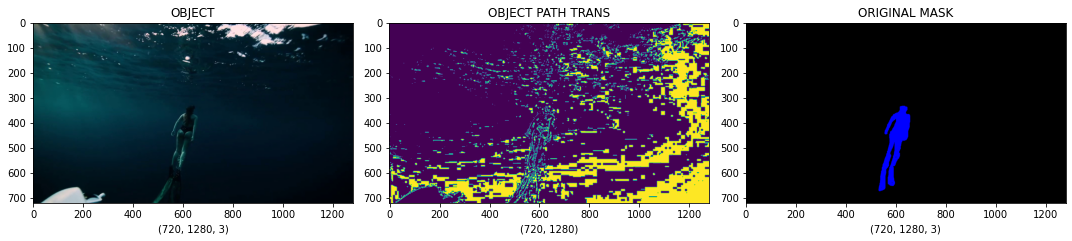

In [48]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][66]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][66]),cv2.COLOR_BGR2RGB)

Red_I,Green_I,Blue_I = cv2.split(EXAMPLE_MASK)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
OBJECT_PATH_TRANS = COPY_OBJECT[:,:,0] == Green_I

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(OBJECT_PATH_TRANS.shape)
axis[1].set_title("OBJECT PATH TRANS")
axis[1].imshow(OBJECT_PATH_TRANS)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

**SUB COLOR SPACE**

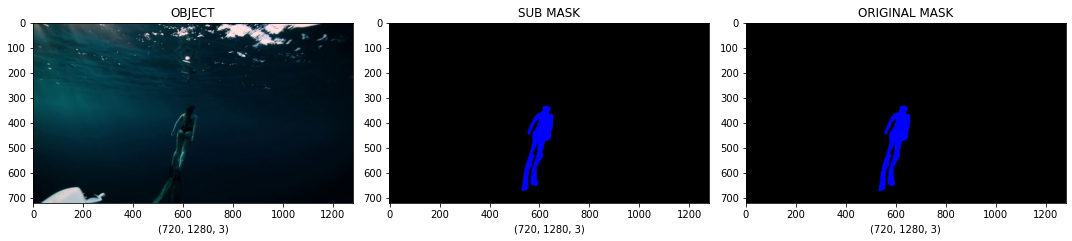

In [49]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][66]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][66]),cv2.COLOR_BGR2RGB)

COPY_MASK = EXAMPLE_MASK.copy()
COPY_MASK[:, :, 0] = 0
COPY_MASK[:, :, 1] = 0

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(COPY_MASK.shape)
axis[1].set_title("SUB MASK")
axis[1].imshow(COPY_MASK)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

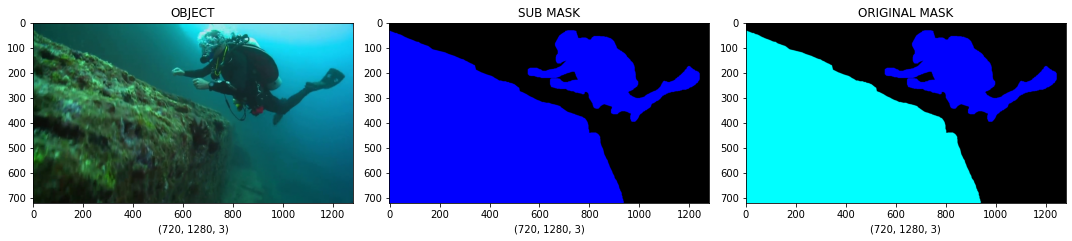

In [50]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][71]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][71]),cv2.COLOR_BGR2RGB)

COPY_MASK = EXAMPLE_MASK.copy()
COPY_MASK[:, :, 0] = 0
COPY_MASK[:, :, 1] = 0

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(COPY_MASK.shape)
axis[1].set_title("SUB MASK")
axis[1].imshow(COPY_MASK)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

**TARGET ON RGB CODES**

In [52]:
RED_COLOR_CODE = [255,0,0]
GREEN_COLOR_CODE = [0,255,0]
BLUE_COLOR_CODE = [0,0,255]

YELLOW_COLOR_CODE = [255,255,0]
BLACK_COLOR_CODE = [0,0,0]
WHITE_COLOR_CODE = [255,255,255]

PINK_COLOR_CODE = [255,192,203]
SKY_BLUE_COLOR_CODE = [135,206,235]

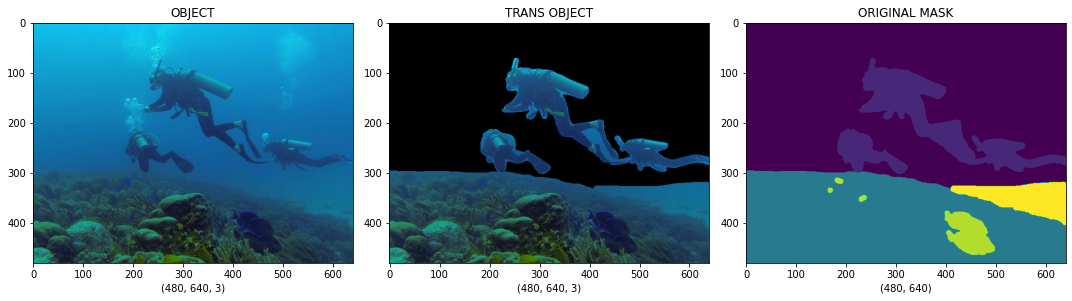

In [54]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2GRAY)

COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[EXAMPLE_MASK == 0] = BLACK_COLOR_CODE

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(COPY_OBJECT.shape)
axis[1].set_title("TRANS OBJECT")
axis[1].imshow(COPY_OBJECT)

axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)

plt.tight_layout()
plt.show()

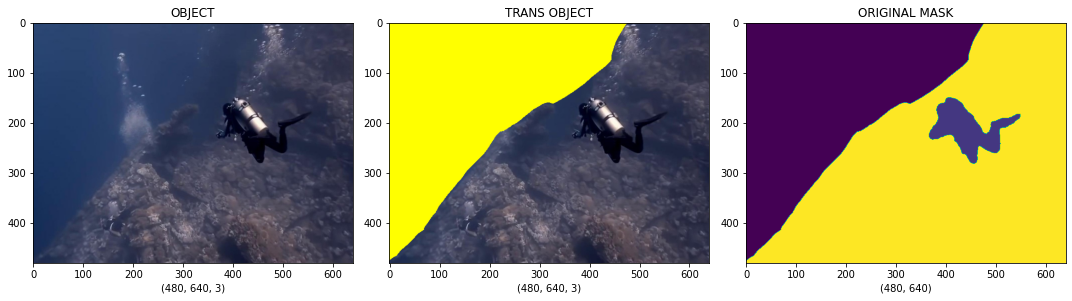

In [55]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][166]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][166]),cv2.COLOR_BGR2GRAY)
COPY_OBJECT = EXAMPLE_OBJECT.copy()
COPY_OBJECT[EXAMPLE_MASK == 0] = YELLOW_COLOR_CODE
figure,axis = plt.subplots(1,3,figsize=(15,15))
axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)
axis[1].set_xlabel(COPY_OBJECT.shape)
axis[1].set_title("TRANS OBJECT")
axis[1].imshow(COPY_OBJECT)
axis[2].set_xlabel(EXAMPLE_MASK.shape)
axis[2].set_title("ORIGINAL MASK")
axis[2].imshow(EXAMPLE_MASK)
plt.tight_layout()
plt.show()

In [56]:
UPPER_BLUE = np.array([130,255,255])
LOWER_BLUE = np.array([110,50,50])

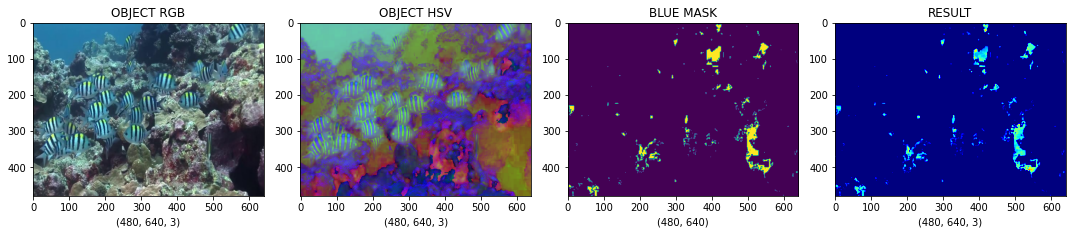

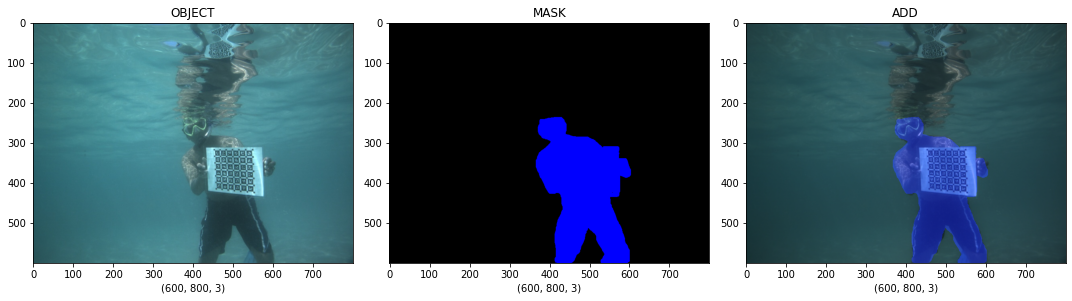

In [5]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][44]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][44]),cv2.COLOR_BGR2RGB)

ADD_IMAGE = cv2.addWeighted(EXAMPLE_OBJECT,0.6,EXAMPLE_MASK,0.4,0.5)

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

axis[2].set_xlabel(ADD_IMAGE.shape)
axis[2].set_title("ADD")
axis[2].imshow(ADD_IMAGE)

plt.tight_layout()
plt.show()


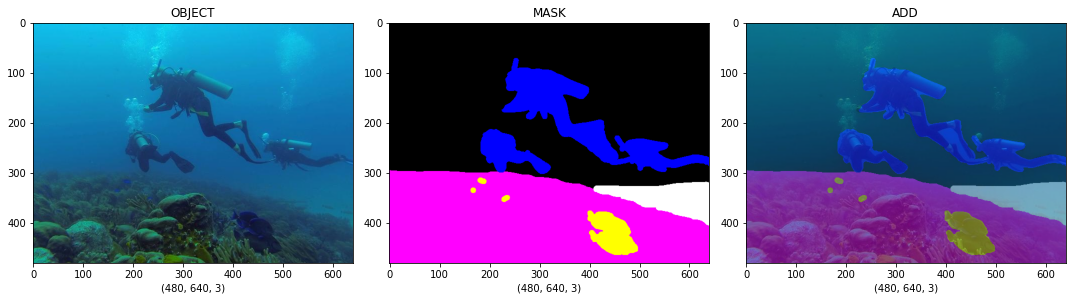

In [6]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][8]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][8]),cv2.COLOR_BGR2RGB)

ADD_IMAGE = cv2.addWeighted(EXAMPLE_OBJECT,0.6,EXAMPLE_MASK,0.4,0.5)

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

axis[2].set_xlabel(ADD_IMAGE.shape)
axis[2].set_title("ADD")
axis[2].imshow(ADD_IMAGE)

plt.tight_layout()
plt.show()

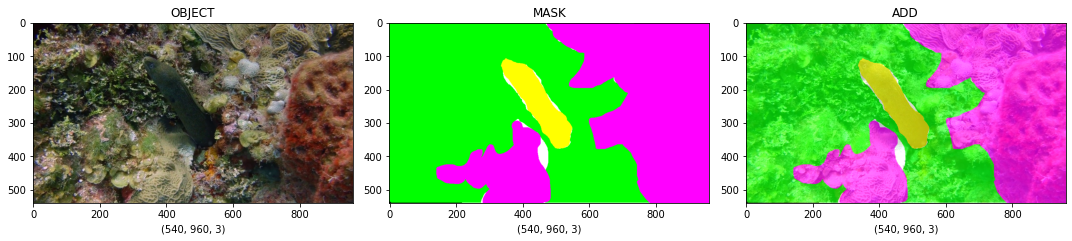

In [7]:
EXAMPLE_OBJECT = cv2.cvtColor(cv2.imread(MAIN_DATA["OBJECTS"][555]),cv2.COLOR_BGR2RGB)
EXAMPLE_MASK = cv2.cvtColor(cv2.imread(MAIN_DATA["MASK"][555]),cv2.COLOR_BGR2RGB)

ADD_IMAGE = cv2.addWeighted(EXAMPLE_OBJECT,0.6,EXAMPLE_MASK,0.7,0.5)

figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].set_xlabel(EXAMPLE_OBJECT.shape)
axis[0].set_title("OBJECT")
axis[0].imshow(EXAMPLE_OBJECT)

axis[1].set_xlabel(EXAMPLE_MASK.shape)
axis[1].set_title("MASK")
axis[1].imshow(EXAMPLE_MASK)

axis[2].set_xlabel(ADD_IMAGE.shape)
axis[2].set_title("ADD")
axis[2].imshow(ADD_IMAGE)

plt.tight_layout()
plt.show()

DATA TRANSFORMATION

In [59]:
MASK_MAIN_TRANSFORMATION = []
OBJECT_MAIN_TRANSFORMATION = []
ADD_MAIN_TRANSFORMATION = []

In [60]:
for x_image,x_mask in zip(MAIN_DATA.OBJECTS,MAIN_DATA.MASK):
    
    IMAGE_X = cv2.cvtColor(cv2.imread(x_image),cv2.COLOR_BGR2RGB)
    MASK_X = cv2.cvtColor(cv2.imread(x_mask),cv2.COLOR_BGR2RGB)
    
    RESIZED_X_IMAGE = cv2.resize(IMAGE_X,(256,256))
    RESIZED_X_MASK = cv2.resize(MASK_X,(256,256))
    
    ADD_X = cv2.addWeighted(RESIZED_X_IMAGE,0.6,RESIZED_X_MASK,0.6,0.5)
    
    RESIZED_X_ADD = cv2.resize(ADD_X,(256,256))
    
    MASK_MAIN_TRANSFORMATION.append(RESIZED_X_MASK)
    OBJECT_MAIN_TRANSFORMATION.append(RESIZED_X_IMAGE)
    ADD_MAIN_TRANSFORMATION.append(RESIZED_X_ADD)

In [61]:
print(" ARRAY IMAGE SHAPE: ",np.shape(np.array(OBJECT_MAIN_TRANSFORMATION)))
print("ARRAY MASK SHAPE: ",np.shape(np.array(MASK_MAIN_TRANSFORMATION)))
print("ARRAY ADD SHAPE: ",np.shape(np.array(ADD_MAIN_TRANSFORMATION)))

 ARRAY IMAGE SHAPE:  (1525, 256, 256, 3)
ARRAY MASK SHAPE:  (1525, 256, 256, 3)
ARRAY ADD SHAPE:  (1525, 256, 256, 3)


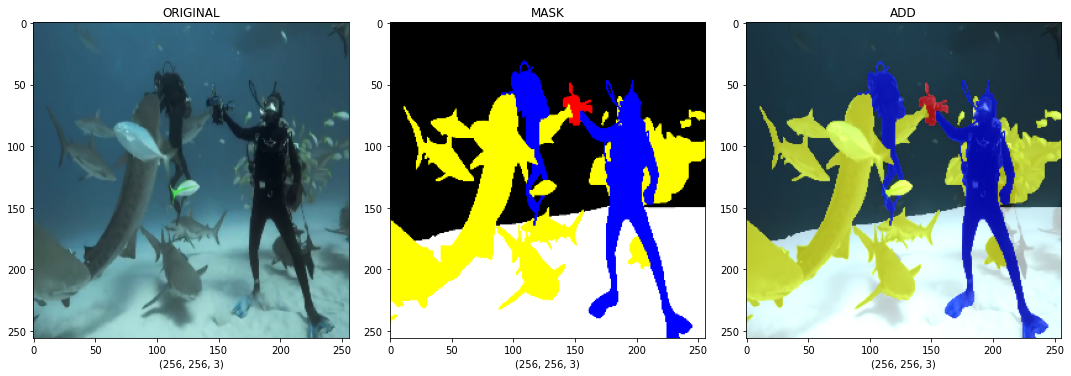

In [62]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].imshow(OBJECT_MAIN_TRANSFORMATION[210],cmap="jet")
axis[0].set_xlabel(OBJECT_MAIN_TRANSFORMATION[210].shape)
axis[0].set_title("ORIGINAL")

axis[1].imshow(MASK_MAIN_TRANSFORMATION[210])
axis[1].set_xlabel(MASK_MAIN_TRANSFORMATION[210].shape)
axis[1].set_title("MASK")

axis[2].imshow(ADD_MAIN_TRANSFORMATION[210])
axis[2].set_xlabel(ADD_MAIN_TRANSFORMATION[210].shape)
axis[2].set_title("ADD")

plt.tight_layout()
plt.show()

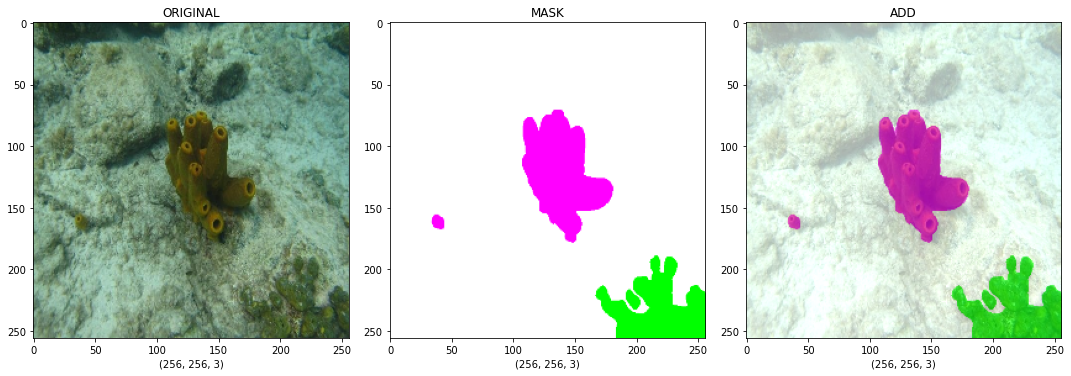

In [63]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

axis[0].imshow(OBJECT_MAIN_TRANSFORMATION[1234],cmap="jet")
axis[0].set_xlabel(OBJECT_MAIN_TRANSFORMATION[1234].shape)
axis[0].set_title("ORIGINAL")

axis[1].imshow(MASK_MAIN_TRANSFORMATION[1234])
axis[1].set_xlabel(MASK_MAIN_TRANSFORMATION[1234].shape)
axis[1].set_title("MASK")

axis[2].imshow(ADD_MAIN_TRANSFORMATION[1234])
axis[2].set_xlabel(ADD_MAIN_TRANSFORMATION[1234].shape)
axis[2].set_title("ADD")

plt.tight_layout()
plt.show()